In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

**Load Dataset**

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Extracting independent and dependent**

In [3]:
X = dataset.iloc[:,[3,4]].values 

**Visualize**
- scatter

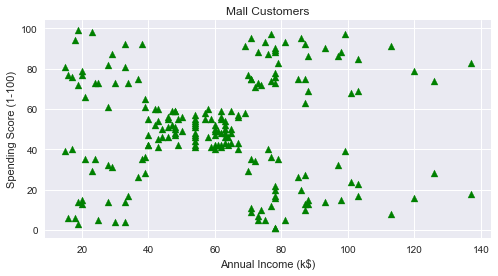

In [4]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],color='green',marker='^')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()

**Building a Machine Learning Model**
- K Means

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss =[]
for i in range(1,21):
    n = i
    model_kmeans = KMeans(n_clusters=n)
    model_kmeans.fit(X)
    wcss.append(model_kmeans.inertia_)
    

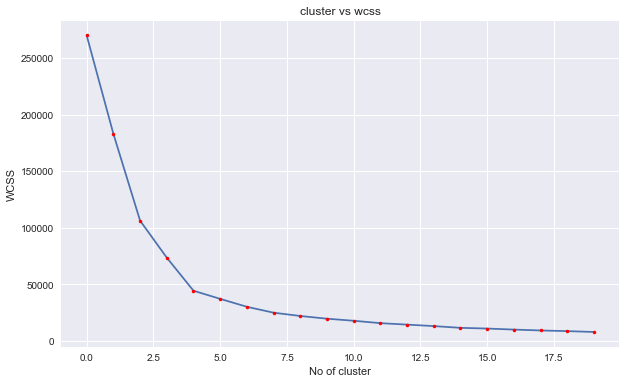

In [11]:
plt.figure(figsize=(10,6))
plt.plot(wcss)
plt.plot(wcss,'r.')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.title('cluster vs wcss')
plt.show()

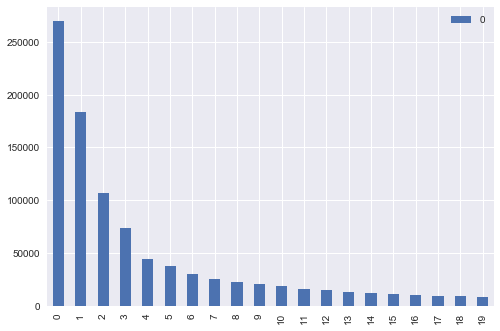

In [101]:
wc_se = pd.DataFrame(wcss)
wc_se.plot.bar()
plt.show()

From Elbow method it found that no. of cluster is 5

In [102]:
n = 5
model_kmeans = KMeans(n_clusters=n)
model_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
y = model_kmeans.predict(X)

In [104]:
cen = model_kmeans.cluster_centers_

** Visualizing scatter plot **

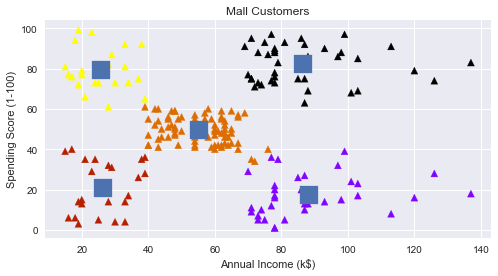

In [105]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],marker='^',c = y,cmap='gnuplot')
plt.scatter(cen[:,0],cen[:,1],marker='s',s = 300)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customers')
plt.show()